In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# Leer la primera hoja del archivo XLSX
df_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')


In [3]:

# Leer la segunda hoja del archivo XLSX
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')



In [3]:
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [43]:
print(df_hechos['TIPO_DE_CALLE'].nunique())
print(df_hechos['LUGAR_DEL_HECHO'].nunique())
print(df_hechos['COMUNA'].nunique())
print(df_hechos['VICTIMA'].nunique())
print(df_hechos['ACUSADO'].nunique())
print(df_hechos['PARTICIPANTES'].nunique())
print(df_hechos['Dirección Normalizada'].nunique())
print(df_hechos['AAAA'].nunique())
print(df_hechos['DD'].nunique())
print(df_hechos['HH'].nunique())
print(df_hechos['N_VICTIMAS'].nunique())


4
683
16
10
10
41
635
6
31
25
3


Convierto el tipo de datos de las variables con valores limitados que estaban guardados como int pero que refieren a lugares o fechas/horas de cuando ocurrio el hecho

In [4]:
df_hechos['COMUNA'] = df_hechos['COMUNA'].astype('category')
df_hechos['AAAA'] = df_hechos['AAAA'].astype('category')
df_hechos['DD'] = df_hechos['DD'].astype('category')
df_hechos['MM'] = df_hechos['MM'].astype('category')



In [29]:
df_hechos['Altura'] = df_hechos['Altura'].astype('category')

In [9]:
df_hechos['Altura'].duplicated()


0      False
1       True
2      False
3       True
4       True
       ...  
691     True
692     True
693     True
694    False
695    False
Name: Altura, Length: 696, dtype: bool

Por el primer analisis de los datos se puede ver que no hay valores duplicados que se refieran a direcciones o valores de identeficacion de los casos. La direccion de los hechos esta completa en todos los registros, los valores flatantes en la columna 'direccion normalizada' pueden ignorarse al ser pocos y al tener esa infomacion ede todas formas tanto en la columna 'LUGAR DEL HECHO' y en la l localizacion exacta de longitud y latitud.

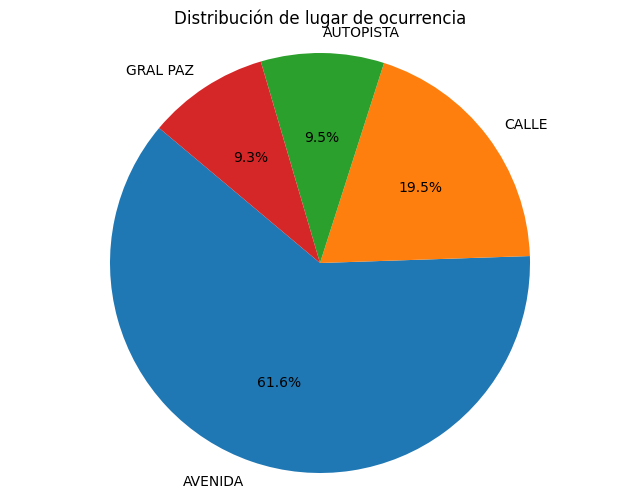

In [6]:
conteo_tipos_calle = df_hechos['TIPO_DE_CALLE'].value_counts()

# Preparar datos para el gráfico de torta
labels = conteo_tipos_calle.index
sizes = conteo_tipos_calle.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de lugar de ocurrencia')
plt.axis('equal')
plt.show()

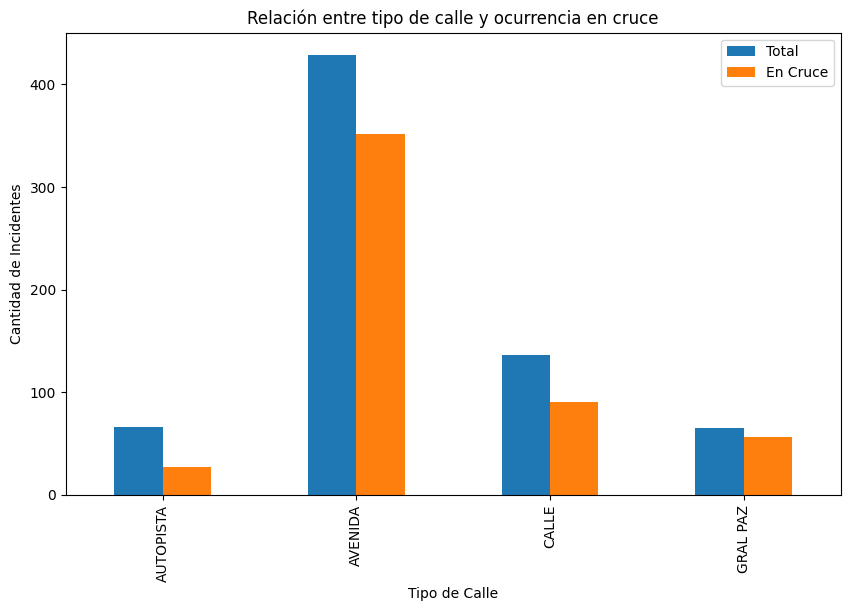

In [11]:
conteo_tipos_calle = df_hechos['TIPO_DE_CALLE'].value_counts()


incidentes_en_cruce = df_hechos[df_hechos['Cruce'].notnull()]['TIPO_DE_CALLE'].value_counts()


relacion_calle_cruce = pd.DataFrame({'Total': conteo_tipos_calle, 'En Cruce': incidentes_en_cruce})
relacion_calle_cruce.fillna(0, inplace=True)  # Rellenar nulos con 0 
# Graficar
relacion_calle_cruce.plot(kind='bar', figsize=(10, 6))
plt.title('Relación entre tipo de calle y ocurrencia en cruce')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Incidentes')
plt.legend()
plt.show()

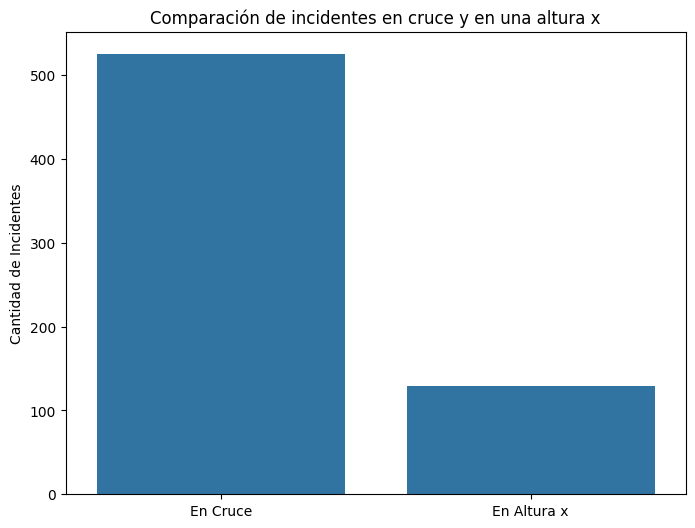

In [18]:
incidentes_en_cruce = df_hechos['Cruce'].notnull().sum()
incidentes_en_altura = df_hechos['Altura'].notnull().sum()

# Graficar la cantidad de incidentes en cruce y en una dirección (altura)
categorias = ['En Cruce', 'En Altura x']
cantidad_incidentes = [incidentes_en_cruce, incidentes_en_altura]

plt.figure(figsize=(8, 6))
sns.barplot(x=categorias, y=cantidad_incidentes)
plt.ylabel('Cantidad de Incidentes')
plt.title('Comparación de incidentes en cruce y en una altura x')
plt.show()

La mayor cantidad de accidentes ocurre en avenidas y en cruces, lo que explica la falta de valores en la columna de altura, ya que corresponden a los casos en los que no se da en cruces. Estos valores faltanrtes se relaciona con la naturaleza de la direccion del hecho y se pueden reprtir alturas en distitas direcciones y avenidas.

In [24]:
df_hechos['Cruce'].value_counts()

Cruce
PAZ, GRAL. AV.              14
ESCALADA AV.                 9
RIVADAVIA AV.                8
INDEPENDENCIA AV.            7
BALBIN, RICARDO, DR. AV.     6
                            ..
LA RIOJA                     1
TRAFUL                       1
HUMAITA                      1
MANZANARES                   1
HUGO, VICTOR                 1
Name: count, Length: 317, dtype: int64

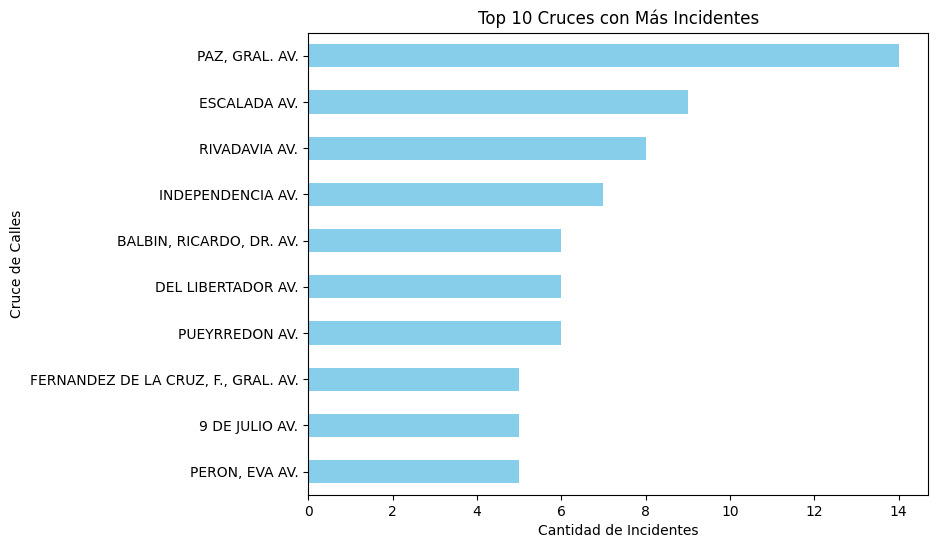

In [9]:
cruces_frecuentes = df_hechos['Cruce'].value_counts().head(10)

plt.figure(figsize=(8, 6))
cruces_frecuentes.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cruces con Más Incidentes')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Cruce de Calles')
plt.gca().invert_yaxis()  
plt.show()

In [24]:
df_hechos['Dirección Normalizada'].value_counts()

Dirección Normalizada
27 DE FEBRERO AV. y ESCALADA AV.                  5
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.         4
PAZ, GRAL. AV. y DEL LIBERTADOR AV.               4
INDEPENDENCIA AV. y CEVALLOS, VIRREY              3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO    3
                                                 ..
AUTOPISTA PERITO MORENO y AUTOPISTA 25 DE MAYO    1
CHORROARIN y SAN MARTIN AV.                       1
COSQUIN y ROCA, CNEL. AV.                         1
ROCA, CNEL. AV. 3555                              1
PADRE CARLOS MUGICA 709                           1
Name: count, Length: 635, dtype: int64

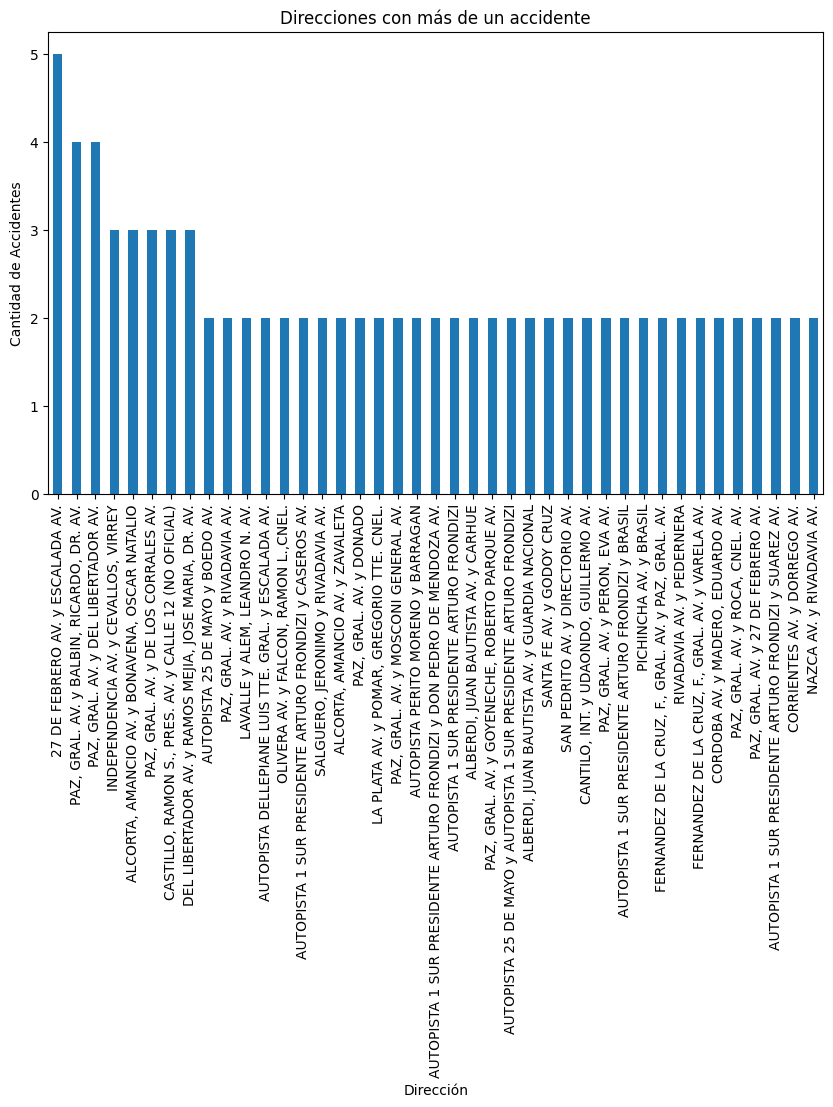

In [23]:
conteo_accidentes = df_hechos['Dirección Normalizada'].value_counts()

# Filtrar las direcciones con más de un accidente
mas_de_un_accidente = conteo_accidentes[conteo_accidentes > 1]

# Graficar las direcciones con más de un accidente
if not mas_de_un_accidente.empty:
    mas_de_un_accidente.plot(kind='bar', figsize=(10, 6))
    plt.title('Direcciones con más de un accidente')
    plt.xlabel('Dirección')
    plt.ylabel('Cantidad de Accidentes')
    plt.show()
else:
    print('No hay direcciones con más de un accidente.')

In [26]:
df_hechos[df_hechos['Dirección Normalizada']=='27 DE FEBRERO AV. y ESCALADA AV.']


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
89,2016-0116,1,2016-09-02,2016,9,2,20:20:00,20,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-AUTO,MOTO,AUTO
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,4,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-SD,MOTO,SD
126,2016-0159,1,2016-12-04,2016,12,4,07:21:00,7,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,AUTO-SD,AUTO,SD
592,2020-0073,1,2020-12-20,2020,12,20,07:40:00,7,27 DE FEBRERO AV. Y ESCALADA AV.,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


A partir de esta primera parte del analisis se puede ver que la mayoria de los accidntes ocurren en avenidas 
siendo estas vias principales internas de la ciudad, en comparacion en porcentaje de los accidentes ocurridos 
en autopista y en la via principal de la Gral. Paz y sus cruces es mucho menor. Por esto se puede considerar 
que la mayoria de los accidentes ocurridos en CABA segun esta informacion son urbanos/internos. 
Esto se puede confirmar obserbando la direccion más recurrente donde ocurren accidentes. El punto donde ocurrieron más accidentes 
recurrentes es el cruce de las avenidas 27 DE FEBRERO AV. y ESCALADA AV. con 5 accidentes

In [16]:
df_hechos.describe()

,N_VICTIMAS,FECHA
count,696.000000,696
mean,1.030172,2018-09-14 05:12:24.827586048
min,1.000000,2016-01-01 00:00:00
25%,1.000000,2017-04-02 12:00:00
50%,1.000000,2018-07-12 12:00:00
75%,1.000000,2020-01-04 06:00:00
max,3.000000,2021-12-30 00:00:00
std,0.179393,NaN


In [51]:
df_hechos['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

In [32]:
df_hechos[df_hechos['N_VICTIMAS']==3]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
170,2017-0035,3,2017-03-23,2017,3,23,05:00:00,5,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,...,NaN,"VILLAFLOR, AZUCENA","ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",1,Point (109583.11620052 102006.72069921),-58.35881506,-34.61113641,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO


La mayoria de los accidentes tuvieron una sola victima, el caso de tres victimas puede considerarse un outlider porla cantidad. 

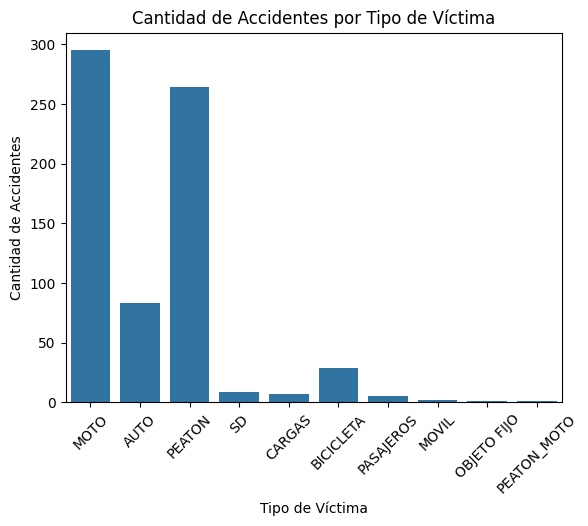

In [57]:
sns.countplot(data=df_hechos, x='VICTIMA')
plt.title('Cantidad de Accidentes por Tipo de Víctima')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

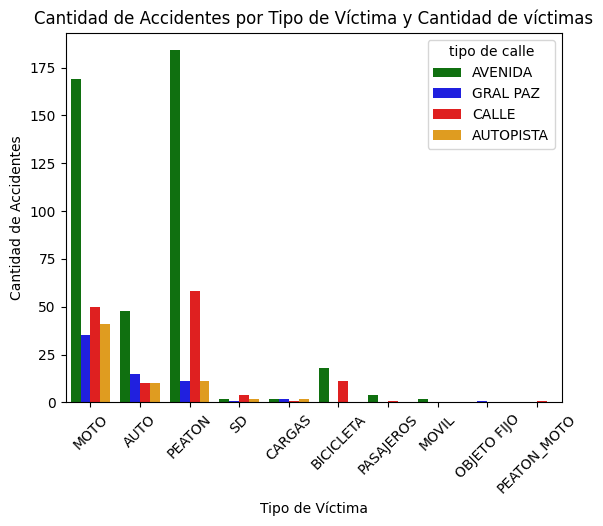

In [71]:
sns.countplot(data=df_hechos, x='VICTIMA', hue='TIPO_DE_CALLE', palette=['green', 'blue', 'red', 'orange'])
plt.title('Cantidad de Accidentes por Tipo de Víctima y Cantidad de víctimas')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='tipo de calle')
plt.xticks(rotation=45)
plt.show()

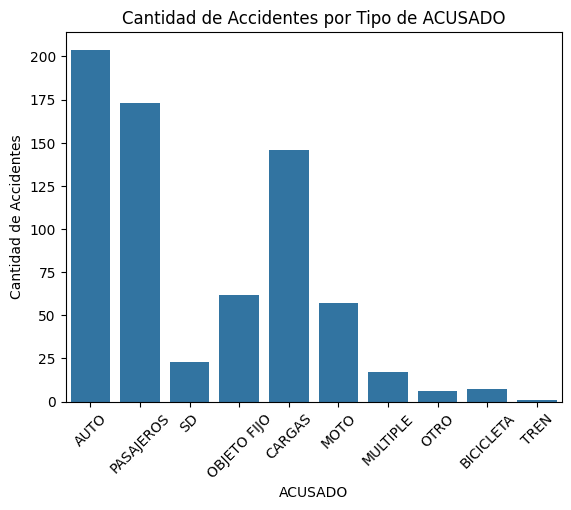

In [5]:
sns.countplot(data=df_hechos, x='ACUSADO')
plt.title('Cantidad de Accidentes por Tipo de ACUSADO')
plt.xlabel('ACUSADO')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

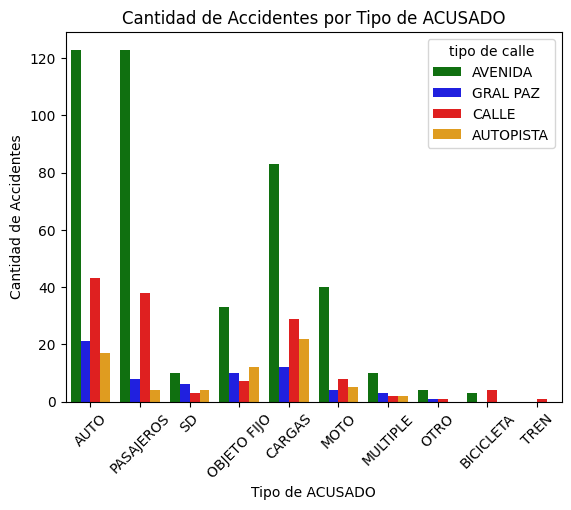

In [15]:
sns.countplot(data=df_hechos, x='ACUSADO', hue='TIPO_DE_CALLE', palette=['green', 'blue', 'red', 'orange'])
plt.title('Cantidad de Accidentes por Tipo de ACUSADO')
plt.xlabel('Tipo de ACUSADO')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='tipo de calle')
plt.xticks(rotation=45)
plt.show()

ACUSADO	refiere al vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal	


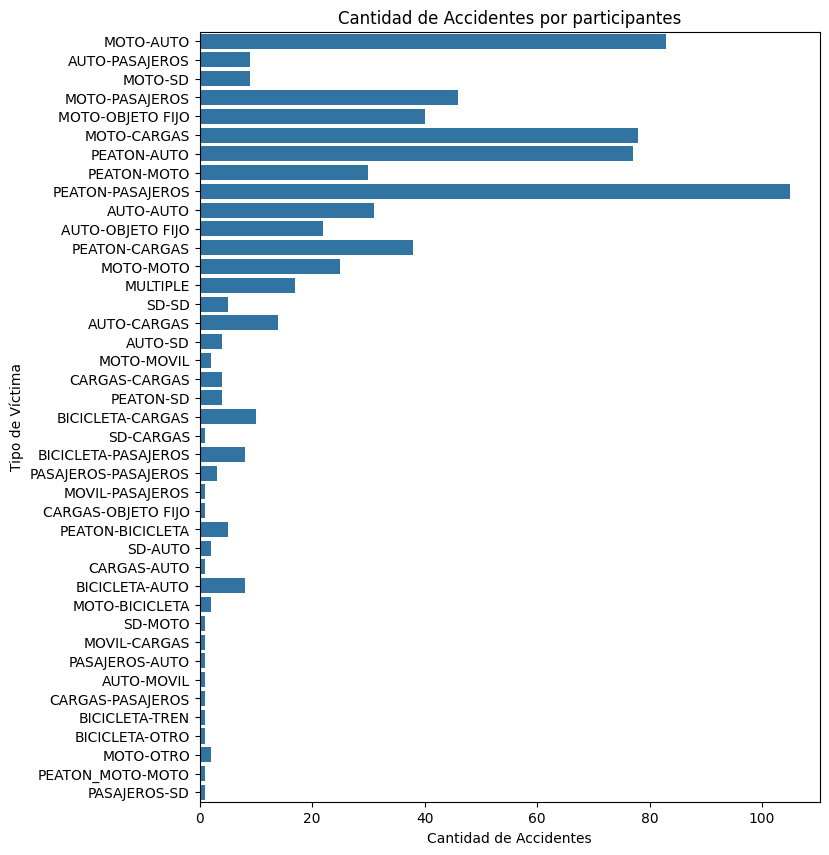

In [14]:
plt.figure(figsize=(8, 10))  
sns.countplot(data=df_hechos, y='PARTICIPANTES')
plt.title('Cantidad de Accidentes por participantes afectados')
plt.ylabel('Tipo de Víctima')
plt.xlabel('Cantidad de Accidentes')
plt.show()


PARTICIPANTES refiere a la conjunción de víctima y acusado	


Se puede ver que los principales implicados en los accidentes son motos y peatones como vitimas, siendo autos y pasajeros de vehiculos los principales del accidente. Tambien se debe destacar los casos donde los acusados son camiones o vehiculos de carga y la participacion de los peatones en los accidentes, tanto como victimas y acusados. Lo que es coherente con la idea de que son en su mayoria accidentes urbanos ocurridos en vias internas de las ciudades . Tambiens se vuelve a ver en todos estos casos que se la mayor cantidad de accidentes ocurren en avenidas y calles reforzando la hipotesis de accidentes urbanos. 

Analsis de por año y por mes de los accidentes

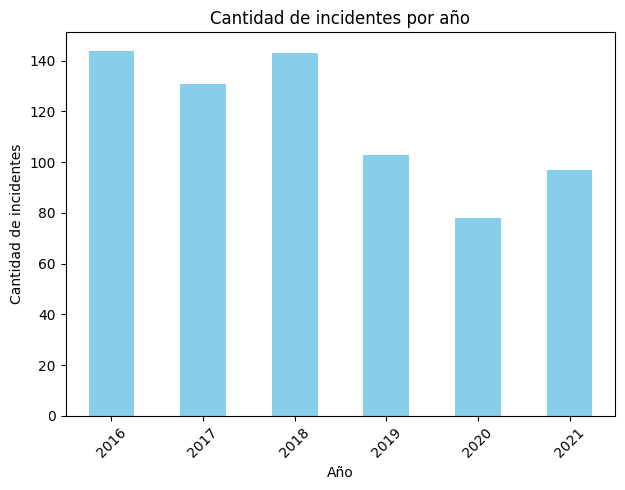

Promedio de accidentes anuales: 116.0
cantidad por año: AAAA
2016    144
2017    131
2018    143
2019    103
2020     78
2021     97
dtype: int64


In [46]:

accidentes_por_anio = df_hechos.groupby('AAAA').size()

promedio_por_anio = df_hechos.groupby('AAAA').size().mean()

plt.figure(figsize=(12, 5))

# Gráfico por año
plt.subplot(1, 2, 1)
accidentes_por_anio.plot(kind='bar', color='skyblue')
plt.title('Cantidad de incidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

print('Promedio de accidentes anuales:', promedio_por_anio)
print('cantidad por año:', accidentes_por_anio)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\1140439344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()


Promedio de accidentes por mes:
MM
1     10.333333
2      9.333333
3      8.500000
4      8.333333
5     10.000000
6      9.666667
7      8.500000
8     10.833333
9      7.833333
10     8.500000
11    11.166667
12    13.000000
dtype: float64


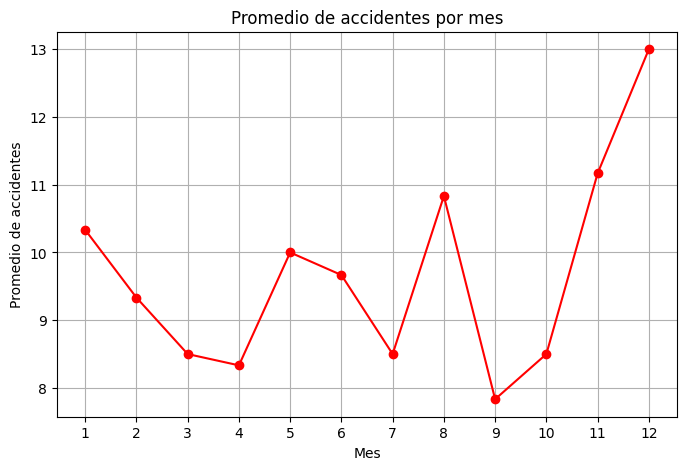

In [33]:

incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()

promedio_por_mes = incidentes_por_mes_por_anio.mean()

print("Promedio de accidentes por mes:")
print(promedio_por_mes)

plt.figure(figsize=(8, 5))
plt.plot(promedio_por_mes.index, promedio_por_mes.values, marker='o', linestyle='-', color='red')
plt.title('Promedio de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de accidentes')
plt.xticks(promedio_por_mes.index)
plt.grid(True)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\1611211648.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()


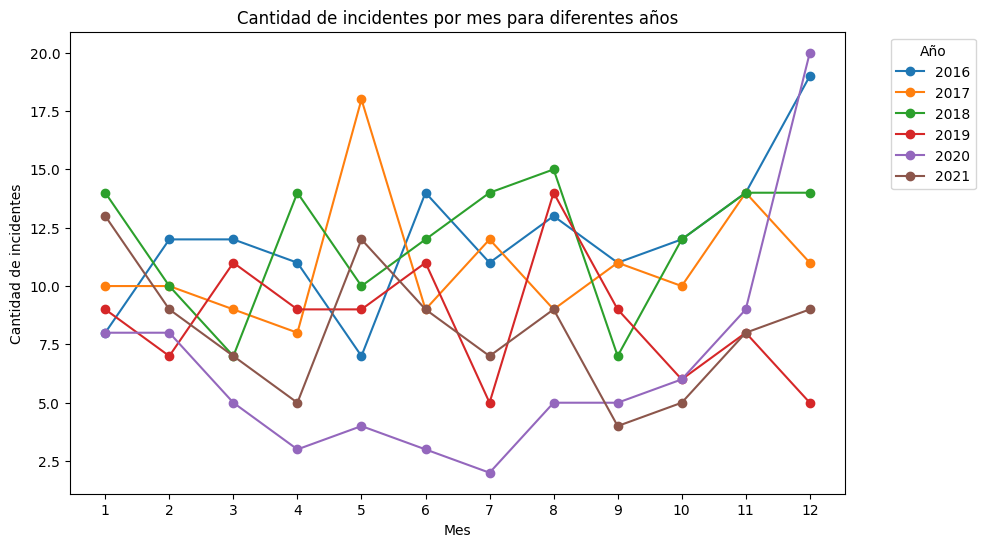

In [27]:
#grafico comparado de accidentes por mes para cada año
incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()

plt.figure(figsize=(10, 6))

for year in incidentes_por_mes_por_anio.index:
    plt.plot(incidentes_por_mes_por_anio.columns, incidentes_por_mes_por_anio.loc[year], marker='o', label=year)

plt.title('Cantidad de incidentes por mes para diferentes años')
plt.xlabel('Mes')
plt.ylabel('Cantidad de incidentes')
plt.xticks(incidentes_por_mes_por_anio.columns)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

En estos analiss se ve que la cantidad de accidentes por año dismunuye desde el 2016(144) al 2021(97), siendo en 2020 el año con menor cantidad de accidentes (78). Se puede ver como la cantidad de accidentes disminuye en los primeros meses del año, lo que se puede relacionar con la menor circulacion de personas y vehiculos por la ciudad, lo cual tambien ocurrio en el 2020. A partir de la mitad del año se puede notar como comienzan a aumentar progresivamnete. En general no parece haber un mes de pico de accidentes marcado comun a todos los años. Si se destaca la disminucion de accidentes a principio de año debido a la menor circulacion

ANALISIS POR HORARIO

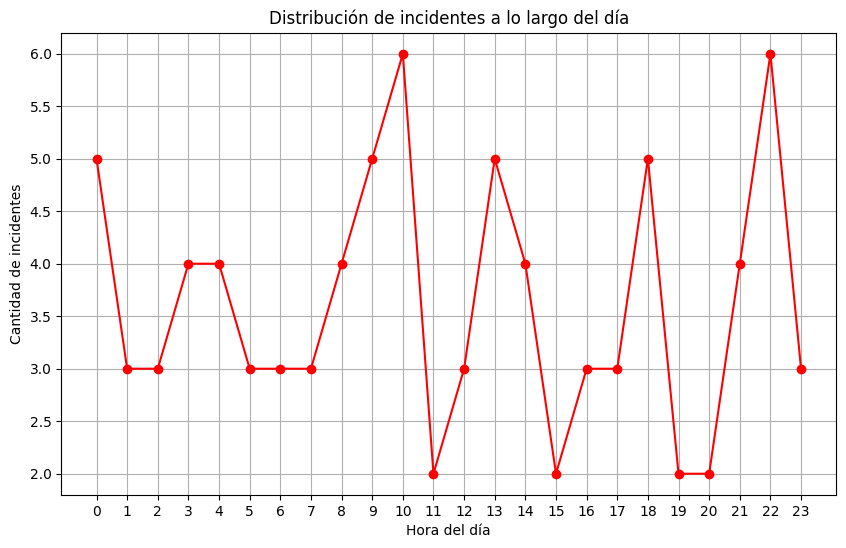

In [22]:


df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], errors='coerce')
df_hechos = df_hechos.dropna(subset=['HORA'])


incidentes_por_hora = df_hechos['HORA'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_hora.index, incidentes_por_hora.values, marker='o', linestyle='-', color='red')
plt.title('Distribución de incidentes a lo largo del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de incidentes')
plt.xticks(range(0, 24))  #  marcas del eje x para representar las 24 horas
plt.grid(True)
plt.show()

Los horarios picos son de lunes a viernes en ambos sentidos de 07:00 a 11:00 y de 16:00 a 20:00. Se puede ver como los accidentes aumentan alrrededor de estos horarios, principalmente en la hora pico matutina

ANALSIS POR COMUNA

In [30]:
conteo_por_comuna=df_hechos['COMUNA'].value_counts()
print(conteo_por_comuna)

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


In [5]:
df_hechos[df_hechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


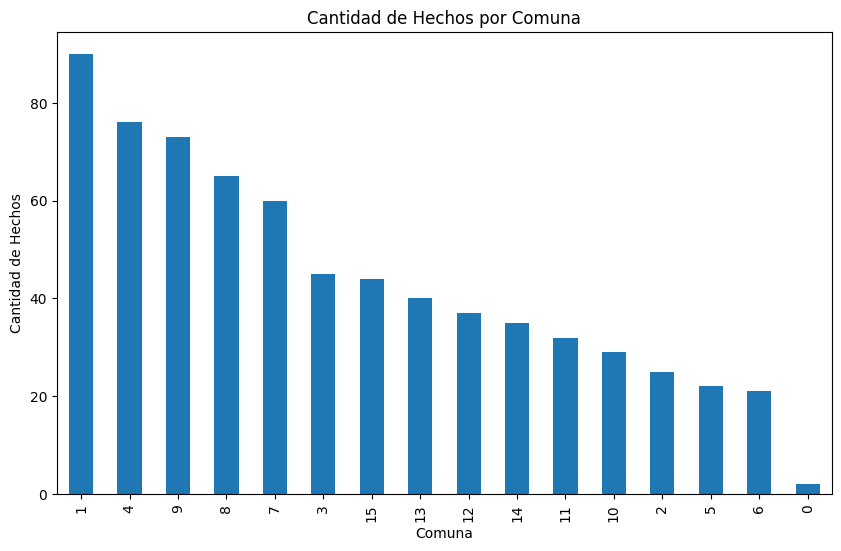

In [10]:
conteo_por_comuna.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de Hechos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Hechos')
plt.show()

In [31]:

conteo_por_comuna=df_hechos['COMUNA'].value_counts()

total_hechos = conteo_por_comuna.sum()

# Calculando el porcentaje que representa cada comuna
porcentaje_por_comuna = (conteo_por_comuna / total_hechos) * 100

print(porcentaje_por_comuna)
print(total_hechos)

COMUNA
1     12.931034
4     10.919540
9     10.488506
8      9.339080
7      8.620690
3      6.465517
15     6.321839
13     5.747126
12     5.316092
14     5.028736
11     4.597701
10     4.166667
2      3.591954
5      3.160920
6      3.017241
0      0.287356
Name: count, dtype: float64
696


In [33]:
conteo_por_comuna = {}

# Iterar sobre cada comuna (supongamos que van de 0 a 14)
for comuna in range(15):
    # Filtrar el DataFrame por cada comuna
    hechos_comuna = df_hechos[df_hechos['COMUNA'] == comuna]
    
    # Contar los hechos por año en la comuna actual
    conteo_por_año = hechos_comuna['AAAA'].value_counts()
    
    # Almacenar los conteos por año en el diccionario para la comuna actual
    conteo_por_comuna[f'Comuna_{comuna}'] = conteo_por_año

# Mostrar los conteos por año para cada comuna
for comuna, conteo_año in conteo_por_comuna.items():
    print(f"Comuna {comuna}:")
    print(conteo_año)
    print("-----------------------")

Comuna Comuna_0:
AAAA
2016    2
2017    0
2018    0
2019    0
2020    0
2021    0
Name: count, dtype: int64
-----------------------
Comuna Comuna_1:
AAAA
2016    22
2018    19
2017    18
2019    12
2020    10
2021     9
Name: count, dtype: int64
-----------------------
Comuna Comuna_2:
AAAA
2018    7
2017    6
2020    5
2021    4
2019    2
2016    1
Name: count, dtype: int64
-----------------------
Comuna Comuna_3:
AAAA
2018    11
2020    10
2016     8
2021     8
2017     6
2019     2
Name: count, dtype: int64
-----------------------
Comuna Comuna_4:
AAAA
2016    16
2017    16
2018    15
2021    13
2019    12
2020     4
Name: count, dtype: int64
-----------------------
Comuna Comuna_5:
AAAA
2019    5
2018    4
2021    4
2016    3
2017    3
2020    3
Name: count, dtype: int64
-----------------------
Comuna Comuna_6:
AAAA
2017    6
2021    5
2016    3
2018    3
2019    2
2020    2
Name: count, dtype: int64
-----------------------
Comuna Comuna_7:
AAAA
2018    16
2017    11
2019    11
201

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17488\3875346240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  COMUNA_ANIO = df_hechos.groupby(['AAAA', 'COMUNA']).size().reset_index(name='Cantidad')


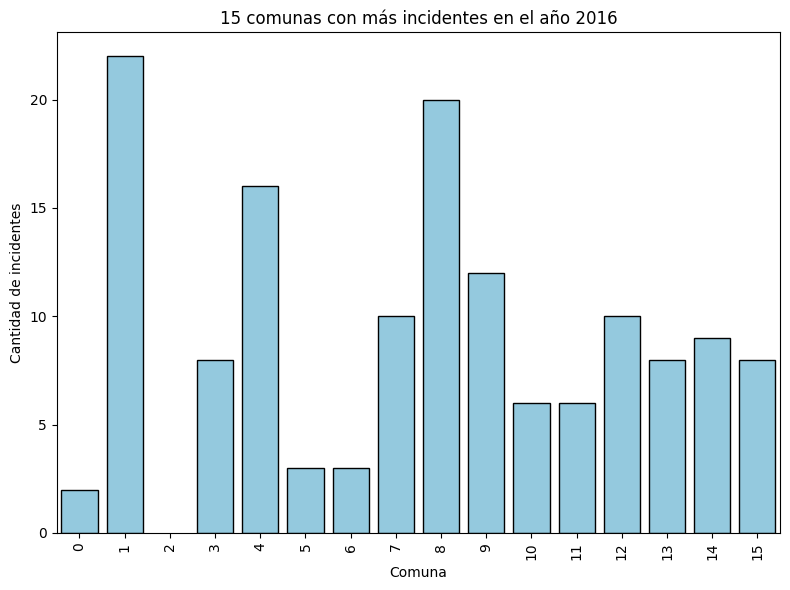

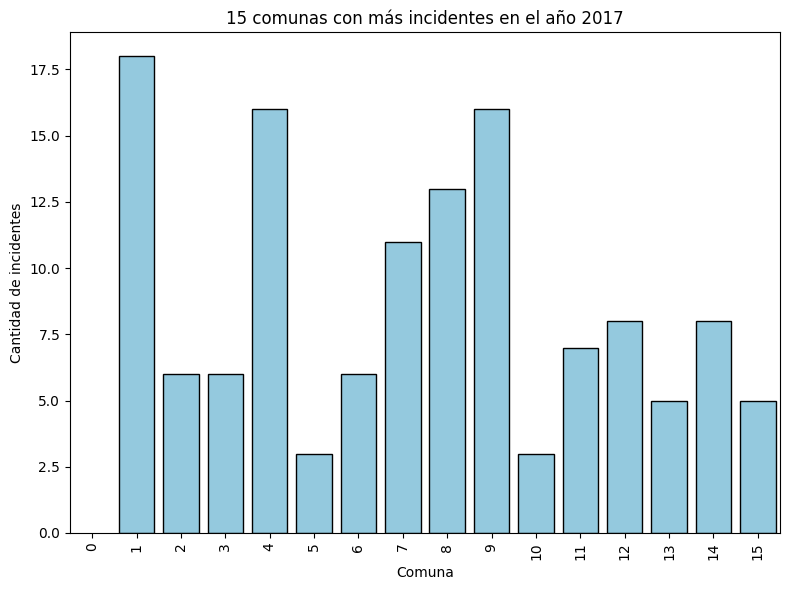

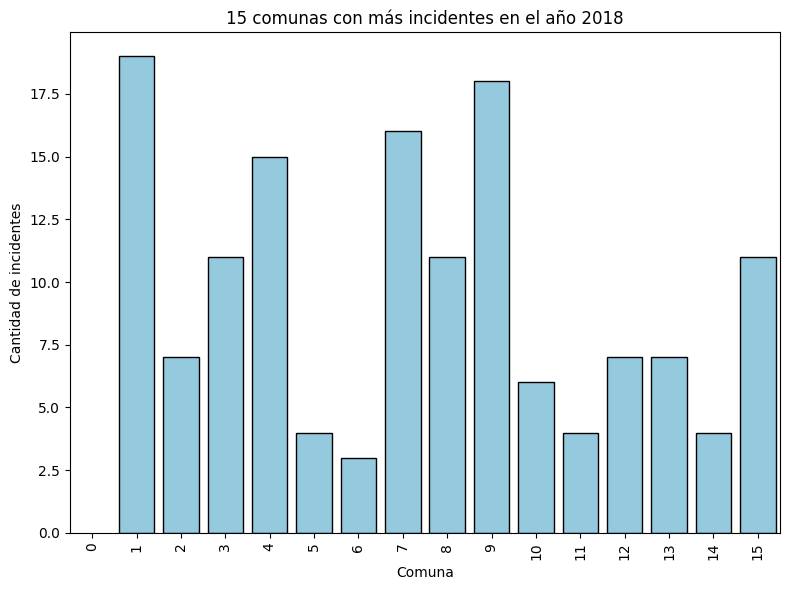

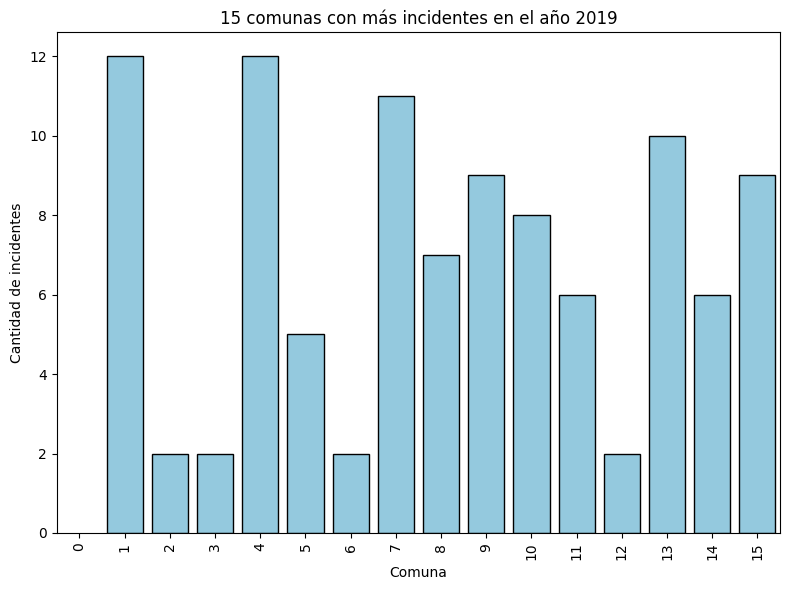

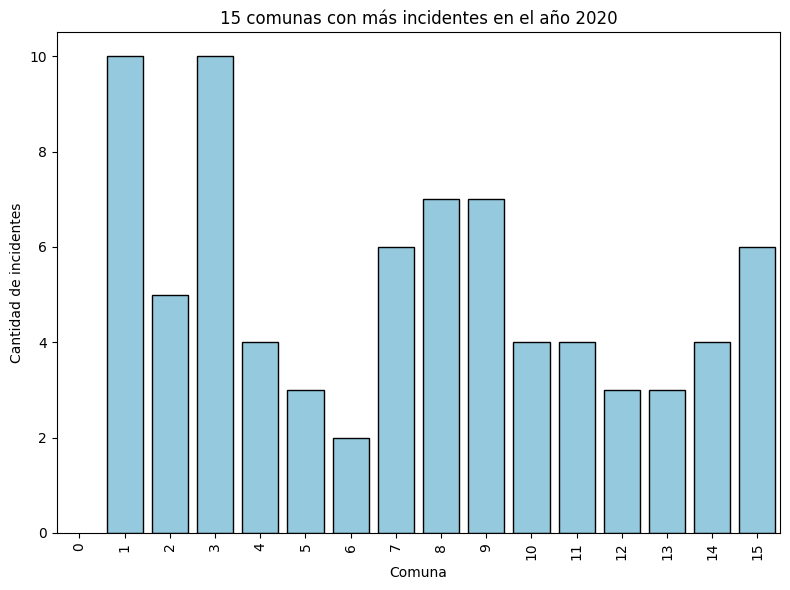

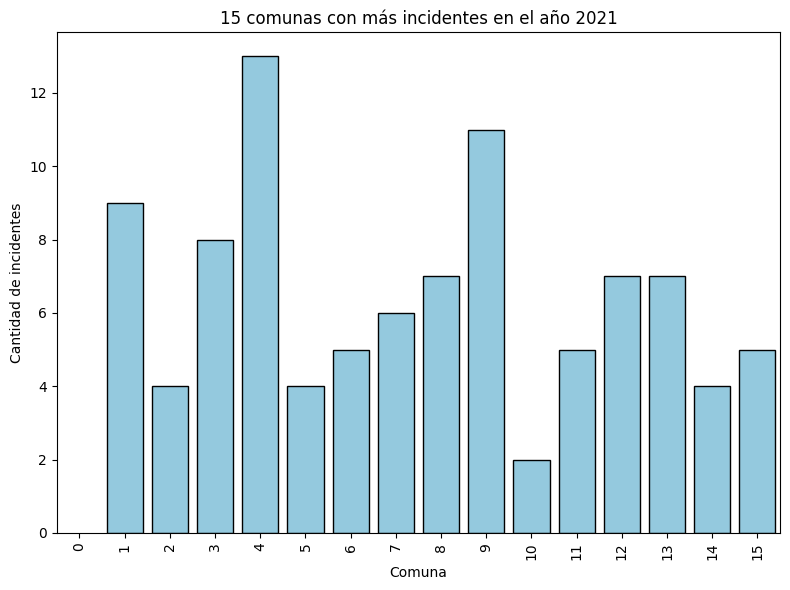

In [35]:
COMUNA_ANIO = df_hechos.groupby(['AAAA', 'COMUNA']).size().reset_index(name='Cantidad')

lista_anios = COMUNA_ANIO['AAAA'].unique()

# Iterar sobre cada año para crear gráficos separados
for anio in lista_anios:
    datos_anio_actual = COMUNA_ANIO[COMUNA_ANIO['AAAA'] == anio].nlargest(15, 'Cantidad')

    plt.figure(figsize=(8, 6))
    sns.barplot(data=datos_anio_actual, x='COMUNA', y='Cantidad', color='skyblue', edgecolor='black')
    plt.title(f'15 comunas con más incidentes en el año {anio}')
    plt.xlabel('Comuna')
    plt.ylabel('Cantidad de incidentes')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Segun el total de los registros en la zona de la comuna 1 se concetran la mayor cantidad de accidentes, pero disminuyen en los ultimos años en el ultimo año. Es integrada por los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Monserrat y Constitución.

DF VICTIMAS

In [30]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [40]:
print(df_victimas['FECHA'].nunique())
print(df_victimas['ID_hecho'].nunique())
print(df_victimas['SEXO'].nunique())


598
696
3


In [58]:

df_victimas['AAAA'] = df_victimas['AAAA'].astype('category')
df_victimas['DD'] = df_victimas['DD'].astype('category')
df_victimas['MM'] = df_victimas['MM'].astype('category')



In [56]:
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')


In [59]:
df_victimas.describe()

,FECHA,EDAD
count,717,664.000000
mean,2018-09-09 01:36:24.100418304,42.167169
min,2016-01-01 00:00:00,1.000000
25%,2017-04-01 00:00:00,27.000000
50%,2018-07-07 00:00:00,37.000000
75%,2019-12-18 00:00:00,56.250000
max,2021-12-30 00:00:00,95.000000
std,NaN,19.788034


edad de la vitima, edad promedio, edad de la mayoria, ouliders

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7948\957271172.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_victimas['EDAD'].dropna(), shade=True, color='red')


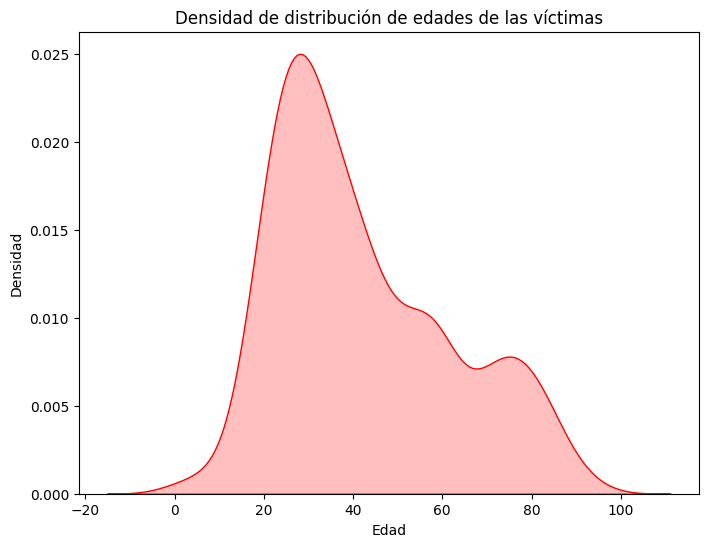

In [51]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_victimas['EDAD'].dropna(), shade=True, color='red')
plt.title('Densidad de distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()


relacion de victimas, genero

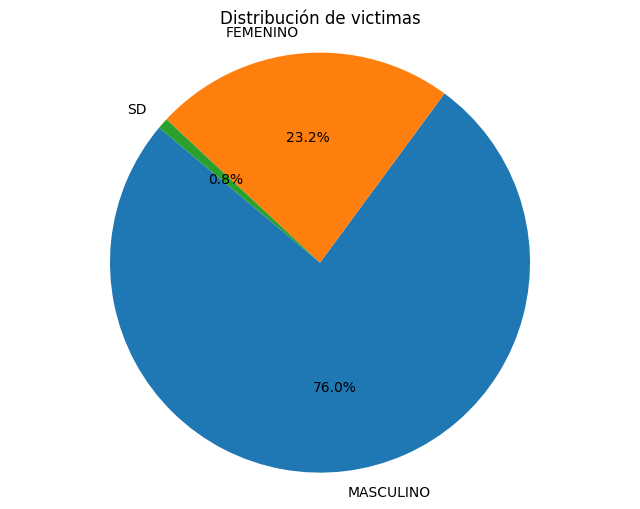

In [25]:
conteo_tipos_calle = df_victimas['SEXO'].value_counts()

# Preparar datos para el gráfico de torta
labels = conteo_tipos_calle.index
sizes = conteo_tipos_calle.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de victimas')
plt.axis('equal')
plt.show()

facecimiento, en el acto

In [63]:
cantidad_sd = (df_victimas['FECHA_FALLECIMIENTO'] == 'SD').sum()
print(f"Cantidad de 'SD' en la columna de fechas: {cantidad_sd}")



Cantidad de 'SD' en la columna de fechas: 68


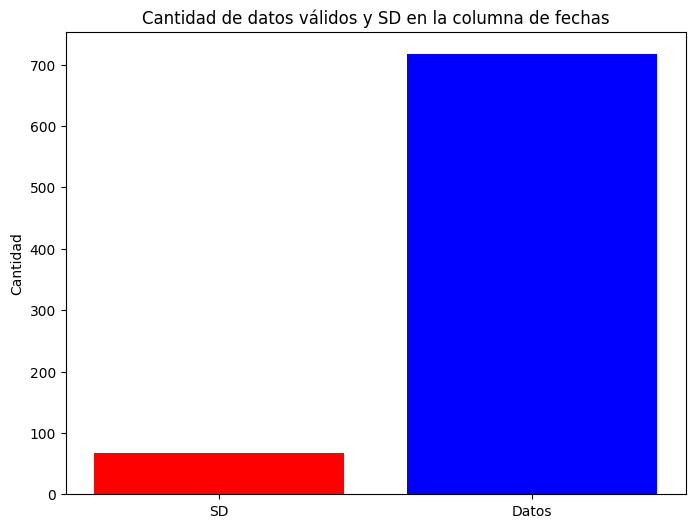

In [65]:
cantidad_sd = (df_victimas['FECHA_FALLECIMIENTO'] == 'SD').sum()
cantidad_no_nulos = df_victimas['FECHA_FALLECIMIENTO'].notnull().sum()

# Crear un gráfico de barras
labels = ['SD', 'Datos']
cantidad_datos = [cantidad_sd, cantidad_no_nulos]

plt.figure(figsize=(8, 6))
plt.bar(labels, cantidad_datos, color=['red', 'blue'])
plt.title('Cantidad de datos válidos y SD en la columna de fechas')
plt.ylabel('Cantidad')
plt.show()

In [68]:
# Convertir la columna 'Fecha_Salida_Hospital' a datetime
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

# Verificar que se haya realizado la conversión correctamente
print(df_victimas['FECHA_FALLECIMIENTO'].dtype)

# Ahora, puedes proceder a calcular la diferencia entre las fechas
# Suponiendo que la columna 'Fecha_Ocurrido' ya está en formato datetime64[ns]
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

# Calcular la diferencia entre las fechas
diferencia_fechas = df_victimas['FECHA_FALLECIMIENTO'] - df_victimas['FECHA']

# Mostrar la diferencia de fechas en días
print(diferencia_fechas)


datetime64[ns]
0      0 days
1      0 days
2      0 days
3         NaT
4     11 days
        ...  
712    0 days
713    5 days
714    0 days
715    3 days
716    5 days
Length: 717, dtype: timedelta64[ns]


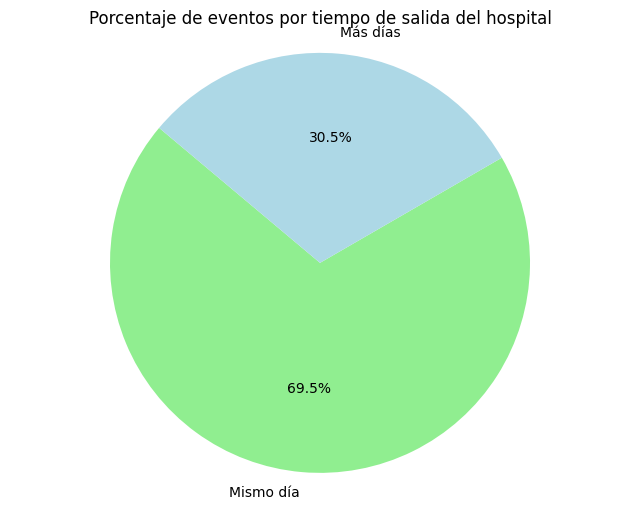

In [78]:

mismo_dia = diferencia_fechas.dt.days == 0

# Contar la cantidad de eventos que ocurrieron en el mismo día y aquellos que tardaron más días
cantidad_mismo_dia = mismo_dia.sum()
cantidad_mas_dias = (~mismo_dia).sum()

# Calcular los porcentajes
total_eventos = len(df_victimas)
porcentaje_mismo_dia = (cantidad_mismo_dia / total_eventos) * 100
porcentaje_mas_dias = (cantidad_mas_dias / total_eventos) * 100

# Crear un gráfico de torta
labels = ['Mismo día', 'Más días']
sizes = [porcentaje_mismo_dia, porcentaje_mas_dias]
colors = ['lightgreen', 'lightblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de eventos por tiempo de salida del hospital')
plt.axis('equal')
plt.show()


ROL?ROL	Posición relativa al vehículo que presentaba la víctima en el momento del siniestro				

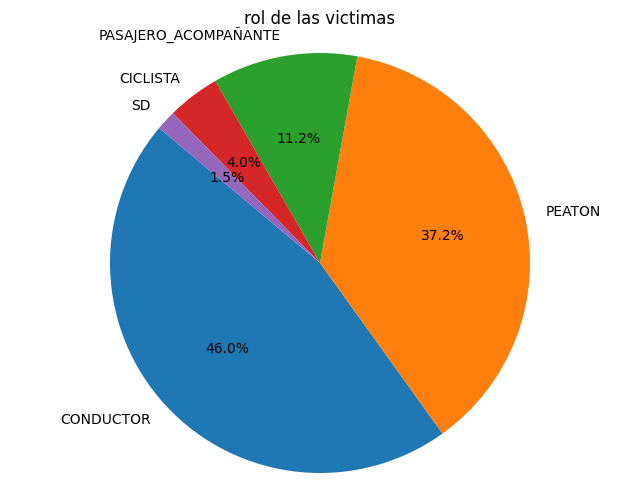

In [82]:
conteo_tipos_calle = df_victimas['ROL'].value_counts()

# Preparar datos para el gráfico de torta
labels = conteo_tipos_calle.index
sizes = conteo_tipos_calle.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('rol de las victimas')
plt.axis('equal')
plt.show()

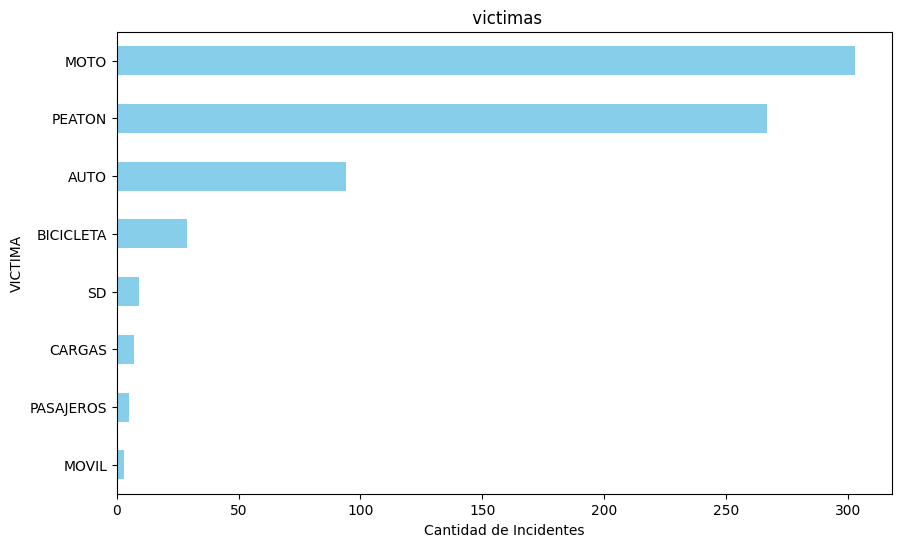

In [60]:

cruces_frecuentes = df_victimas['VICTIMA'].value_counts().head(10)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
cruces_frecuentes.plot(kind='barh', color='skyblue')
plt.title(' victimas')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el más frecuente arriba
plt.show()

En este analsiss eve que la mayora de las victimas eran masculinos, de alrrededor de 30 años de edad, siendo los conductores del vhiculo moto o peatones en la mayoria de los casos. El 69.5% de las victimas fallece el mismo dia del accidente. 

Como analsis de todos los datos se puede decir que el facotr principal que determian la cantidad de hechos ocurridos es la ciruclacion de personas y vehiculos, siendo qeu estos diminuyen en lo montos del año de menor circlacion (verano) y aumentan durante las hora pico. Un elemnto que confirma esto es la baja de accidentes en 2020 cuando la circulacion estaba restringida.
En la comuna 1 (integrada por los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Monserrat y Constitución) y 4 (barrios de Barracas, La Boca, Nueva Pompeya y Parque Patricios) se centran la mayor cantidad total de accidentes. Espacios de circulacion dinamica de vehiculos y peatones, y de multiles cruces de otras vias. 
Las principales victimas son peatones y motocicletas(conductores) en hechos con autos como culpable del hecho. Considerando tambien la edad y el genro de la mayoria de las victimas se podria considerar que en  la mayoria de los accidentes se trata de deliveri o mensajeria (trabajo principalmente masculino). Tambien se debe destacar los casos donde los acusados son camiones o vehiculos de carga y la participacion de los peatones en los accidentes, tanto como victimas y acusados. Lo que es coherente con la idea de que son en su mayoria accidentes urbanos ocurridos en vias internas de las ciudades . Tambiens se vuelve a ver en todos estos casos que se la mayor cantidad de accidentes ocurren en avenidas y calles reforzando la hipotesis de accidentes urbanos. 